# Logistic Regression

## 1. Binary Classification

|score($x$)|result($y$)|
|-----|---|
|45|Fail|
|50|Fail|
|55|Fail|
|60|Pass|
|65|Pass|
|70|Pass|

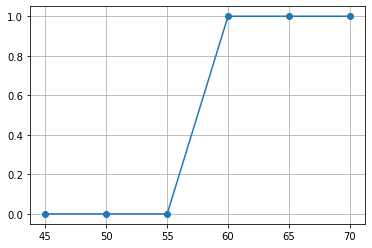

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
x = [45, 50, 55, 60, 65, 70]
y = [0, 0, 0, 1, 1, 1]

plt.plot(x, y, marker='o')
plt.grid()
plt.show()

이러한 관계를 모델링 하기 위해서 Linear Regression에서 사용 했던 $H(\mathbf{x}) = \mathbf{w}\cdot\mathbf{x} + b$에 sigmoid 함수 $\sigma(\cdot)$을 적용해서 새로운 $H$를 정의 한다.

따라서 새로운 $H(\mathbf{x})$는 다음과 같다.
$$H(\mathbf{x})=\sigma(\mathbf{w}\cdot\mathbf{x}+ b)$$

Sigmoid 함수는 다음과 같다.
$$\sigma(x) = \frac{1}{1+ e^{-x}}=\frac{e^x}{e^x+1}$$

## 2. Sigmoid Function

In [2]:
# plt.axhline(y=0.5, color='red', linewidth=1.5)
import numpy as np
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

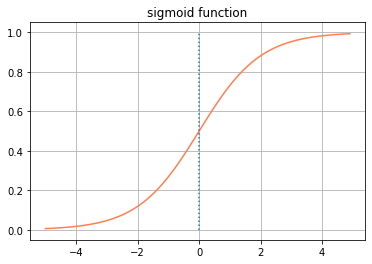

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'coral')
plt.plot([0, 0], [0, 1.0], ':')
plt.title('sigmoid function')
plt.grid()
plt.show()

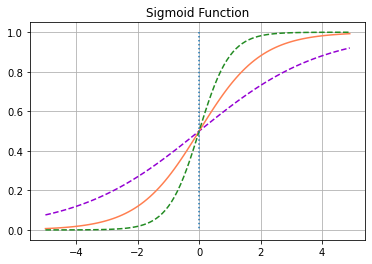

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'darkviolet', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'coral') # W의 값이 1일때
plt.plot(x, y3, 'forestgreen', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.grid()
plt.show()

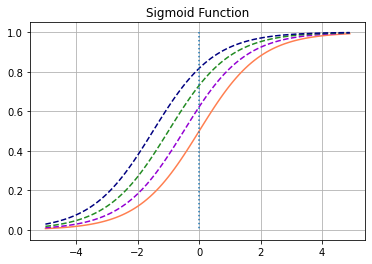

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y0 = sigmoid(x)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y0, 'coral') # x
plt.plot(x, y1, 'darkviolet', linestyle='--') # x + 0.5
plt.plot(x, y2, 'forestgreen', linestyle='--') # x + 1
plt.plot(x, y3, 'navy', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.grid()
plt.show()

## 3. Cost function

Binary Classification을 위해서는 $y=1$인 경우에 예측 값 $H(\mathbf{x})$ (class가 1일 확률) 이 0에 가까우면 오차가 커야 하고 $y=0$인 경우에 예측값 $H(\mathbf{x})$ (class가 1일 확률)이 1에 가까우면 오차가 커야 한다.

/tmp/ipykernel_1167381/2893733998.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, -np.log(x), label='$-log(H(x))$')


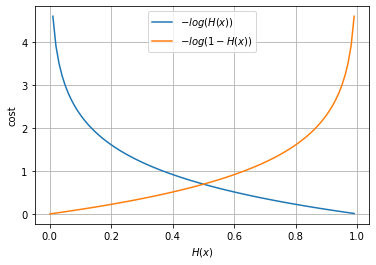

In [6]:
x = np.arange(0, 1, 0.01)
plt.plot(x, -np.log(x), label='$-log(H(x))$')
plt.plot(x, -np.log(1-x), label='$-log(1-H(x))$')
plt.xlabel('$H(x)$')
plt.ylabel('cost')
plt.legend()
plt.grid()

$$\mathcal{L}(H(x), y)=-[y\log H(x) + (1-y)\log(1-H(x)]$$
$$\mathcal{L}(W)=-\frac{1}{N}\sum_{i=1}^{n}[y^{i}\log H(x^i)+(1-y^i)\log (1-H(x^i))]$$

## 4. Logistic Regression with Pytorch

### 4.1. 기본 구현

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [9]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [10]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [11]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [12]:
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [13]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [14]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [15]:
# pytorch library에서 제공하는 loss
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

전체 코드

In [16]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [17]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [18]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


### 4.2. nn.Module로 구현하기

In [19]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [20]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [21]:
model(x_train)

tensor([[0.2416],
        [0.0991],
        [0.1200],
        [0.0298],
        [0.0160],
        [0.0130]], grad_fn=<SigmoidBackward>)

In [22]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 2.083512 Accuracy 50.00%
Epoch   10/1000 Cost: 0.637285 Accuracy 50.00%
Epoch   20/1000 Cost: 0.481986 Accuracy 66.67%
Epoch   30/1000 Cost: 0.407468 Accuracy 83.33%
Epoch   40/1000 Cost: 0.345894 Accuracy 83.33%
Epoch   50/1000 Cost: 0.292534 Accuracy 83.33%
Epoch   60/1000 Cost: 0.244461 Accuracy 100.00%
Epoch   70/1000 Cost: 0.201508 Accuracy 100.00%
Epoch   80/1000 Cost: 0.168714 Accuracy 100.00%
Epoch   90/1000 Cost: 0.150390 Accuracy 100.00%
Epoch  100/1000 Cost: 0.139363 Accuracy 100.00%
Epoch  110/1000 Cost: 0.130207 Accuracy 100.00%
Epoch  120/1000 Cost: 0.122205 Accuracy 100.00%
Epoch  130/1000 Cost: 0.115147 Accuracy 100.00%
Epoch  140/1000 Cost: 0.108876 Accuracy 100.00%
Epoch  150/1000 Cost: 0.103266 Accuracy 100.00%
Epoch  160/1000 Cost: 0.098218 Accuracy 100.00%
Epoch  170/1000 Cost: 0.093652 Accuracy 100.00%
Epoch  180/1000 Cost: 0.089502 Accuracy 100.00%
Epoch  190/1000 Cost: 0.085713 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082240 Accuracy 100.00

### 4.3. Class로 Logistic Regression 구현하기 + CustomDataset 사용해 보기

In [23]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [24]:
# Custom Dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # Data Preprocessing
        self.x_data = torch.FloatTensor([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
        self.y_data = torch.FloatTensor([[0], [0], [0], [1], [1], [1]])
        
    def __len__(self):
        # number of data samples
        return len(self.x_data)
    
    def __getitem__(self, idx):
        # return value of a specific idx
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

In [25]:
from torch.utils.data import DataLoader

dataset = CustomDataset()
data_loader = DataLoader(dataset, batch_size=2)

In [26]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        # self.layers = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

    def forward(self, x):
        return self.sigmoid(self.linear(x))
        # return self.layers(x)

In [27]:
model = BinaryClassifier()

In [28]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    for x, y in data_loader:
        # H(x) 계산
        hypothesis = model(x_train)
        # cost 계산
        cost = F.binary_cross_entropy(hypothesis, y_train)
        
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print(f"Epoch {epoch}/{nb_epochs} Cost: {cost.item()} Accuracy: {accuracy*100:.2f}%") # 각  Epoch 마다 정확도 출력

Epoch 0/1000 Cost: 0.855828583240509 Accuracy: 50.00%
Epoch 10/1000 Cost: 0.4996068477630615 Accuracy: 83.33%
Epoch 20/1000 Cost: 0.2556703984737396 Accuracy: 83.33%
Epoch 30/1000 Cost: 0.14623068273067474 Accuracy: 100.00%
Epoch 40/1000 Cost: 0.11967483907938004 Accuracy: 100.00%
Epoch 50/1000 Cost: 0.1014670729637146 Accuracy: 100.00%
Epoch 60/1000 Cost: 0.08815795183181763 Accuracy: 100.00%
Epoch 70/1000 Cost: 0.07800012081861496 Accuracy: 100.00%
Epoch 80/1000 Cost: 0.06998679786920547 Accuracy: 100.00%
Epoch 90/1000 Cost: 0.06349902600049973 Accuracy: 100.00%
Epoch 100/1000 Cost: 0.05813531577587128 Accuracy: 100.00%
Epoch 110/1000 Cost: 0.05362421274185181 Accuracy: 100.00%
Epoch 120/1000 Cost: 0.049775440245866776 Accuracy: 100.00%
Epoch 130/1000 Cost: 0.046451736241579056 Accuracy: 100.00%
Epoch 140/1000 Cost: 0.04355137422680855 Accuracy: 100.00%
Epoch 150/1000 Cost: 0.04099760577082634 Accuracy: 100.00%
Epoch 160/1000 Cost: 0.0387311615049839 Accuracy: 100.00%
Epoch 170/1000 